<a name="top"></a>

DaViTpy - models
==
***

This notebook introduces useful space science models included in davitpy.  
   
Currently we have ported/wrapped the following models to python:  

- <a href="#igrf">IGRF-11</a>
- <a href="#iri">IRI</a>
- <a href="#tsyg">TSYGANENKO (T96)</a>
- <a href="#msis">MSIS (NRLMSISE00)</a>
- <a href="#hwm">HWM-07</a>
- <a href="#hwm">AACGM</a>

In [1]:
%pylab inline
from datetime import datetime as dt
from davitpy.models import *
from davitpy import utils

Populating the interactive namespace from numpy and matplotlib


***
###<a name="igrf"/>IGRF - International Geomagnetic Reference Field
<a href="#top">[top]</a>

In [2]:
# INPUTS
itype = 1 # Geodetic coordinates
pyDate = dt(2006,2,23)
date = utils.dateToDecYear(pyDate) # decimal year
alt = 300. # altitude
stp = 5.
xlti, xltf, xltd = -90.,90.,stp # latitude start, stop, step
xlni, xlnf, xlnd = -180.,180.,stp # longitude start, stop, step
ifl = 0 # Main field
# Call fortran subroutine
lat,lon,d,s,h,x,y,z,f = igrf.igrf11(itype,date,alt,ifl,xlti,xltf,xltd,xlni,xlnf,xlnd)

/usr/local/lib/python2.7/dist-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/usr/local/lib/python2.7/dist-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


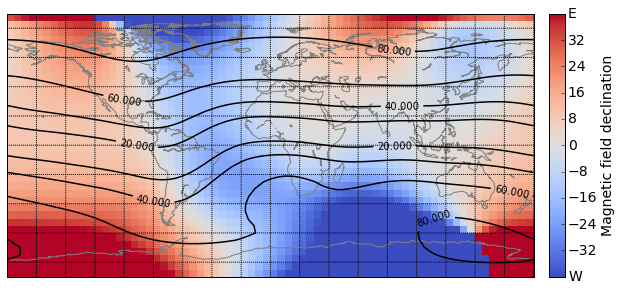

In [3]:
# Check that it worked by plotting magnetic dip angle contours on a map
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import meshgrid

# Set figure
fig = figure(figsize=(10,5))
ax = fig.add_subplot(111)
rcParams.update({'font.size': 14})

# Set-up the map background
map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
map.drawmapboundary()
map.drawcoastlines(color='0.5')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,20.))
map.drawmeridians(np.arange(-180.,181.,20.))

# The igrf output needs to be reshaped to be plotted
dip = s.reshape((180./stp+1,360./stp+1))
dec = d.reshape((180./stp+1,360./stp+1))
lo = lon[0:(360./stp+1)]
la = lat[0::(360./stp+1)]
x,y = meshgrid(lo,la)
v = arange(0,90,20)

# Plot dip angle contours and labels
cs = map.contour(x, y, abs(dip), v, latlon=True, linewidths=1.5, colors='k')
labs = plt.clabel(cs, inline=1, fontsize=10)

# Plot declination and colorbar
im = map.pcolormesh(x, y, dec, vmin=-40, vmax=40, cmap='coolwarm')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", "3%", pad="3%")
colorbar(im, cax=cax)
cax.set_ylabel('Magnetic field declination')
cticks = cax.get_yticklabels()
cticks = [t.__dict__['_text'] for t in cticks]
cticks[0], cticks[-1] = 'W', 'E'
_ = cax.set_yticklabels(cticks)
savefig('dipdec.png')

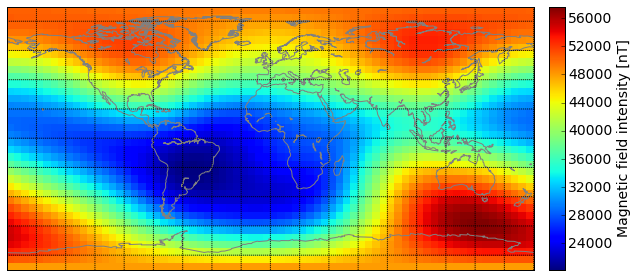

In [4]:
# Check that it worked by plotting magnetic dip angle contours on a map
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import meshgrid

# Set figure
fig = figure(figsize=(10,5))
ax = fig.add_subplot(111)
rcParams.update({'font.size': 14})

# Set-up the map background
map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
map.drawmapboundary()
map.drawcoastlines(color='0.5')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,20.))
map.drawmeridians(np.arange(-180.,181.,20.))

# The igrf output needs to be reshaped to be plotted
babs = f.reshape((180./stp+1,360./stp+1))
lo = lon[0:(360./stp+1)]
la = lat[0::(360./stp+1)]
x,y = meshgrid(lo,la)
v = arange(0,90,20)

# Plot declination and colorbar
im = map.pcolormesh(x, y, babs, cmap='jet')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", "3%", pad="3%")
colorbar(im, cax=cax)
cax.set_ylabel('Magnetic field intensity [nT]')

savefig('babs.png')

***
###<a name="iri"/>IRI - International Reference Ionosphere
<a href="#top">[top]</a>

*  **JF switches to turn off/on (True/False) several options**

*  [0] :    True
    * Ne computed            
    * Ne not computed
*  [1] :    True
    * Te, Ti computed        
    * Te, Ti not computed
*  [2] :    True
    * Ne & Ni computed       
    * Ni not computed
*  [3] :    False
    * B0 - Table option      
    * B0 - other models jf[30]
*  [4] :    False
    * foF2 - CCIR            
    * foF2 - URSI
*  [5] :    False
    * Ni - DS-95 & DY-85     
    * Ni - RBV-10 & TTS-03
*  [6] :    True
    * Ne - Tops: f10.7<188   
    * f10.7 unlimited          
*  [7] :    True
    * foF2 from model        
    * foF2 or NmF2 - user input
*  [8] :    True
    * hmF2 from model        
    * hmF2 or M3000F2 - user input
*  [9] :    True
    * Te - Standard          
    * Te - Using Te/Ne correlation
* [10] :    True
    * Ne - Standard Profile  
    * Ne - Lay-function formalism
* [11] :    True
    * Messages to unit 6     
    * to meesages.text on unit 11
* [12] :    True
    * foF1 from model        
    * foF1 or NmF1 - user input
* [13] :    True
    * hmF1 from model        
    * hmF1 - user input (only Lay version)
* [14] :    True
    * foE  from model        
    * foE or NmE - user input
* [15] :    True
    * hmE  from model        
    * hmE - user input
* [16] :    True
    * Rz12 from file         
    * Rz12 - user input
* [17] :    True
    * IGRF dip, magbr, modip 
    * old FIELDG using POGO68/10 for 1973
* [18] :    True
    * F1 probability model   
    * critical solar zenith angle (old)
* [19] :    True
    * standard F1            
    * standard F1 plus L condition
* [20] :    False
    * ion drift computed     
    * ion drift not computed
* [21] :    True
    * ion densities in %     
    * ion densities in m-3
* [22] :    False
    * Te_tops (Aeros,ISIS)   
    * Te_topside (TBT-2011)
* [23] :    True
    * D-region: IRI-95       
    * Special: 3 D-region models
* [24] :    True
    * F107D from APF107.DAT  
    * F107D user input (oarr[41])
* [25] :    True
    * foF2 storm model       
    * no storm updating
* [26] :    True
    * IG12 from file         
    * IG12 - user
* [27] :    False
    * spread-F probability   
    * not computed
* [28] :    False
    * IRI01-topside          
    * new options as def. by JF[30]
* [29] :    False
    * IRI01-topside corr.    
    * NeQuick topside model
* [28,29]:
    * [t,t] IRIold, 
    * [f,t] IRIcor, 
    * [f,f] NeQuick, 
    * [t,f] Gulyaeva
* [30] :    True
    * B0,B1 ABT-2009     
    * B0 Gulyaeva h0.5
* [31] :    True
    * F10.7_81 from file     
    * PF10.7_81 - user input (oarr[45])
* [32] :    False
    * Auroral boundary model on
    * Auroral boundary model off
* [33] :    True
    * Messages on            
    * Messages off
* [34] :    False
    * foE storm model        
    * no foE storm updating
* [..] :    ....
* [50] :    ....

In [ ]:
# Inputs
jf = [True]*50
jf[2:6] = [False]*4
jf[20] = False
jf[22] = False
jf[27:30] = [False]*3
jf[32] = False
jf[34] = False
jmag = 0.
alati = 40. 
along = -80.
iyyyy = 2012
mmdd = 806 
dhour = 12. 
heibeg, heiend, heistp = 80., 500., 10. 
oarr = np.zeros(100)
# Call fortran subroutine
outf,oarr = iri.iri_sub(jf,jmag,alati,along,iyyyy,mmdd,dhour,heibeg,heiend,heistp,oarr)

In [1]:
# Check that it worked by plotting vertical electron density profile
figure(figsize=(5,8))

alt = np.arange(heibeg,heiend,heistp)
ax = plot(outf[0,0:len(alt)],alt)

xlabel(r'Electron density [m$^{-3}$]')
ylabel('Altitude [km]')
grid(True)
rcParams.update({'font.size': 12})

NameError: name 'figure' is not defined

***
###<a name="tsyg"/>Tsyganenko (Geopack and T96)
<a href="#top">[top]</a>

- **The "Porcelain" way** (recommended)

In [2]:
lats = range(10, 90, 10)
lons = zeros(len(lats))
rhos = 6372.*ones(len(lats))
trace = tsyganenko.tsygTrace(lats, lons, rhos)
print trace
ax = trace.plot()

NameError: name 'zeros' is not defined

- **The "Plumbing" way**

In [3]:
# Inputs
# Date and time
year = 2000
doy = 1
hr = 1
mn = 0
sc = 0
# Solar wind speed
vxgse = -400.
vygse = 0.
vzgse = 0.
# Execution parameters
lmax = 5000
rlim = 60. 
r0 = 1. 
dsmax = .01
err = .000001
# Direction of the tracing
mapto = 1
# Magnetic activity [SW pressure (nPa), Dst, ByIMF, BzIMF]
parmod = np.zeros(10)
parmod[0:4] = [2, -8, -2, -5]
# Start point (rh in Re)
lat = 50.
lon = 0.
rh = 0.

# This has to be called first
tsyganenko.tsygFort.recalc_08(year,doy,hr,mn,sc,vxgse,vygse,vzgse)

# Convert lat,lon to geographic cartesian and then gsw
r,theta,phi, xgeo, ygeo, zgeo = tsyganenko.tsygFort.sphcar_08(1., np.radians(90.-lat), np.radians(lon), 0., 0., 0., 1)
xgeo,ygeo,zgeo,xgsw,ygsw,zgsw  = tsyganenko.tsygFort.geogsw_08(xgeo, ygeo, zgeo,0,0,0,1)

# Trace field line
xfgsw,yfgsw,zfgsw,xarr,yarr,zarr,l = tsyganenko.tsygFort.trace_08(xgsw,ygsw,zgsw,mapto,dsmax,err, 
    rlim,r0,0,parmod,'T96_01','IGRF_GSW_08',lmax) 

# Convert back to spherical geographic coords
xfgeo,yfgeo,zfgeo,xfgsw,yfgsw,zfgsw  = tsyganenko.tsygFort.geogsw_08(0,0,0,xfgsw,yfgsw,zfgsw,-1)
gcR, gdcolat, gdlon, xgeo, ygeo, zgeo = tsyganenko.tsygFort.sphcar_08(0., 0., 0., xfgeo, yfgeo, zfgeo, -1)


print '** START: {:6.3f}, {:6.3f}, {:6.3f}'.format(lat, lon, 1.)
print '** STOP:  {:6.3f}, {:6.3f}, {:6.3f}'.format(90.-np.degrees(gdcolat), np.degrees(gdlon), gcR)

NameError: name 'np' is not defined

In [ ]:
# A quick checking plot
from mpl_toolkits.mplot3d import proj3d
import numpy as np
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# Plot coordinate system
ax.plot3D([0,1],[0,0],[0,0],'b')
ax.plot3D([0,0],[0,1],[0,0],'g')
ax.plot3D([0,0],[0,0],[0,1],'r')

# First plot a nice sphere for the Earth
u = np.linspace(0, 2 * np.pi, 179)
v = np.linspace(0, np.pi, 179)
tx = np.outer(np.cos(u), np.sin(v))
ty = np.outer(np.sin(u), np.sin(v))
tz = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(tx,ty,tz,rstride=10, cstride=10, color='grey', alpha=.5, zorder=2, linewidth=0.5)

# Then plot the traced field line
latarr = [10.,20.,30.,40.,50.,60.,70.,80.]
lonarr = [0., 180.]
rh = 0.
for lon in lonarr:
    for lat in latarr:
        r,theta,phi, xgeo, ygeo, zgeo = tsyganenko.tsygFort.sphcar_08(1., np.radians(90.-lat), np.radians(lon), 0., 0., 0., 1)
        xgeo,ygeo,zgeo,xgsw,ygsw,zgsw  = tsyganenko.tsygFort.geogsw_08(xgeo, ygeo, zgeo,0,0,0,1)
        xfgsw,yfgsw,zfgsw,xarr,yarr,zarr,l = tsyganenko.tsygFort.trace_08(xgsw,ygsw,zgsw,mapto,dsmax,err, 
            rlim,r0,0,parmod,'T96_01','IGRF_GSW_08',lmax) 
        for i in xrange(l):
            xgeo,ygeo,zgeo,dum,dum,dum  = tsyganenko.tsygFort.geogsw_08(0,0,0,xarr[i],yarr[i],zarr[i],-1)
            xarr[i],yarr[i],zarr[i] = xgeo,ygeo,zgeo
        ax.plot3D(xarr[0:l],yarr[0:l],zarr[0:l], zorder=3, linewidth=2, color='y')

# Set plot limits
lim=4
ax.set_xlim3d([-lim,lim])
ax.set_ylim3d([-lim,lim])
ax.set_zlim3d([-lim,lim])

***
###<a name="msis"/>MSIS - Mass Spectrometer and Incoherent Scatter Radar
<a href="#top">[top]</a>

####The fortran subroutine needed is gtd7:
* **INPUTS**:
  * **IYD** - year and day as YYDDD (day of year from 1 to 365 (or 366)) (Year ignored in current model)
  * **SEC** - UT (SEC)
  * **ALT** - altitude (KM)
  * **GLAT** - geodetic latitude (DEG)
  * **GLONG** - geodetic longitude (DEG)
  * **STL** - local aparent solar time (HRS; see Note below)
  * **F107A** - 81 day average of F10.7 flux (centered on day DDD)
  * **F107** - daily F10.7 flux for previous day
  * **AP** - magnetic index (daily) OR when SW(9)=-1., array containing:
      * (1) daily AP
      * (2) 3 HR AP index FOR current time
      * (3) 3 HR AP index FOR 3 hrs before current time
      * (4) 3 HR AP index FOR 6 hrs before current time
      * (5) 3 HR AP index FOR 9 hrs before current time
      * (6) average of height 3 HR AP indices from 12 TO 33 HRS prior to current time
      * (7) average of height 3 HR AP indices from 36 TO 57 HRS prior to current time
  * **MASS** - mass number (only density for selected gass is calculated.  MASS 0 is temperature.  
    MASS 48 for ALL. MASS 17 is Anomalous O ONLY.)
* **OUTPUTS**:
  * **D(1)** - HE number density(CM-3)
  * **D(2)** - O number density(CM-3)
  * **D(3)** - N2 number density(CM-3)
  * **D(4)** - O2 number density(CM-3)
  * **D(5)** - AR number density(CM-3)                       
  * **D(6)** - total mass density(GM/CM3)
  * **D(7)** - H number density(CM-3)
  * **D(8)** - N number density(CM-3)
  * **D(9)** - Anomalous oxygen number density(CM-3)
  * **T(1)** - exospheric temperature
  * **T(2)** - temperature at ALT

In [ ]:
# Inputs
import datetime as dt
myDate = dt.datetime(2012, 7, 5, 12, 35)
glat = 40.
glon = -80.
mass = 48

# First, MSIS needs a bunch of input which can be obtained from tabulated values
# This function was written to access these values (not provided with MSIS by default)
solInput = msis.getF107Ap(myDate)

# Also, to switch to SI units:
msis.meters(True)

# Other input conversion
iyd = (myDate.year - myDate.year/100*100)*100 + myDate.timetuple().tm_yday
sec = myDate.hour*24. + myDate.minute*60.
stl = sec/3600. + glon/15.

In [ ]:
altitude = linspace(0., 500., 100)
temp = zeros(shape(altitude))
dens = zeros(shape(altitude))
N2dens = zeros(shape(altitude))
O2dens = zeros(shape(altitude))
Odens = zeros(shape(altitude))
Ndens = zeros(shape(altitude))
Ardens = zeros(shape(altitude))
Hdens = zeros(shape(altitude))
Hedens = zeros(shape(altitude))
for ia,alt in enumerate(altitude):
    d,t = msis.gtd7(iyd, sec, alt, glat, glon, stl, solInput['f107a'], solInput['f107'], solInput['ap'], mass)
    temp[ia] = t[1]
    dens[ia] = d[5]
    N2dens[ia] = d[2]
    O2dens[ia] = d[3]
    Ndens[ia] = d[7]
    Odens[ia] = d[1]
    Hdens[ia] = d[6]
    Hedens[ia] = d[0]
    Ardens[ia] = d[4]

In [ ]:
figure(figsize=(16,8))
#rcParams.update({'font.size': 12})

subplot(131)
plot(temp, altitude)
gca().set_xscale('log')
xlabel('Temp. [K]')
ylabel('Altitude [km]')

subplot(132)
plot(dens, altitude)
gca().set_xscale('log')
gca().set_yticklabels([])
xlabel(r'Mass dens. [kg/m$^3$]')

subplot(133)
plot(Odens, altitude, 'r-', 
     O2dens, altitude, 'r--',
     Ndens, altitude, 'g-',
     N2dens, altitude, 'g--',
     Hdens, altitude, 'b-',
     Hedens, altitude, 'y-',
     Ardens, altitude, 'm-')
gca().set_xscale('log')
gca().set_yticklabels([])
xlabel(r'Density [m$^3$]')
leg = legend(  (r'O', 
                r'O$_2$', 
                r'N',
                r'N$_2$',
                r'H',
                r'He',
                r'Ar',),
           'upper right')

tight_layout()

***
###<a name="hwm"/>HWM07: Horizontal Wind Model
<a href="#top">[top]</a>

* **Input arguments**:
    * **iyd** - year and day as yyddd
    * **sec** - ut(sec)
    * **alt** - altitude(km)
    * **glat** - geodetic latitude(deg)
    * **glon** - geodetic longitude(deg)
    * **stl** - not used
    * **f107a** - not used
    * **f107** - not used
    * **ap** - two element array with    
        * ap(1) = not used    
        * ap(2) = current 3hr ap index

* **Output argument**:
   * **w(1)** = meridional wind (m/sec + northward)
   * **w(2)** = zonal wind (m/sec + eastward)

In [ ]:
w = hwm.hwm07(11001, 0., 200., 40., -80., 0, 0, 0, [0, 0])

In [ ]:
print w

***
###<a name="hwm"/>AACGM--Altitude Adjusted Corrected Geomagnetic Coordinates</a>
<a href="http://superdarn.jhuapl.edu/software/analysis/aacgm/">AACGM Homepage</a><br>
<a href="#top">[top]</a>

**models.aacgm.aacgmConv(lat,lon,alt,flg)**

convert between geographic coords and aacgm

* **Input arguments**:
    * **lat** - latitude
    * **lon** - longitude
    * **alt** - altitude(km)
    * **flg** - flag to indicate geo to AACGM (0) or AACGM to geo (1)

* **Outputs**:
   * **olat** = output latitude
   * **olon** = output longitude
   * **r** = the accuracy of the transform

In [ ]:
#geo to aacgm
glat,glon,r = aacgm.aacgmConv(42.0,-71.4,300.,2000,0)
print glat, glon, r

In [ ]:
#aacgm to geo
glat,glon,r = aacgm.aacgmConv(52.7,6.6,300.,2000,1)
print glat, glon, r

**models.aacgm.aacgmConvArr(lat,lon,alt,flg)**

convert between geographic coords and aacgm (array form)

* **Input arguments**:
    * **lat** - latitude list
    * **lon** - longitude list
    * **alt** - altitude(km) list
    * **flg** - flag to indicate geo to AACGM (0) or AACGM to geo (1)

* **Outputs**:
   * **olat** = output latitude list
   * **olon** = output longitude list
   * **r** = the accuracy of the transform

In [ ]:
#geo to aacgm
olat,olon,r = aacgm.aacgmConvArr([10.,20.,30.,40.],[80.,90.,100.,110.],[100.,150.,200.,250.],2000,0)
print olat
print olon
print r

**models.aacgm.mltFromEpoch(epoch,mlon)**

calculate magnetic local time from epoch time and mag lon

* **Input arguments**:
    * **epoch** - the target time in epoch format
    * **mlon** - the input magnetic longitude

* **Outputs**:
   * **mlt** = the magnetic local time


In [ ]:
import datetime as dt
myDate = dt.datetime(2012,7,10)
epoch = utils.timeUtils.datetimeToEpoch(myDate)
mlt = aacgm.mltFromEpoch(epoch,52.7)
print mlt

**models.aacgm.mltFromYmdhms(yr,mo,dy,hr,mt,sc,mlon)**

calculate magnetic local time from  year, month, day, hour, minute, second and mag lon

* **Input arguments**:
    * **yr** - the year
    * **mo** - the month
    * **dy** - the day
    * **hr** - the hour
    * **mt** - the minute
    * **sc** - the second
    * **mlon** - the input magnetic longitude

* **Outputs**:
   * **mlt** = the magnetic local time

In [ ]:
mlt = aacgm.mltFromYmdhms(2012,7,10,0,0,0,52.7)
print mlt

**models.aacgm.mltFromYrsec(yr,yrsec,mlon)**

calculate magnetic local time from seconds elapsed in the year and mag lon

* **Input arguments**:
    * **yr** - the year
    * **yrsec** - the year seconds
    * **mlon** - the input magnetic longitude

* **Outputs**:
   * **mlt** = the magnetic local time

In [ ]:
yrsec = int(utils.timeUtils.datetimeToEpoch(dt.datetime(2012,7,10)) - utils.timeUtils.datetimeToEpoch(dt.datetime(2012,1,1)))
print yrsec
mlt = aacgm.mltFromYrsec(2013,yrsec,52.7)
print mlt